## Importing the important libraries

In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Data Preparation and Cleaning

In [272]:
# read the dataset
country_data = pd.read_csv("C:/Users/483582/Desktop/Car Price Assignment/Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [273]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [274]:
round(100*(country_data.isnull().sum())/len(country_data), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

Since their are no null values no imputation is required for the dataset

## Box Plots and Outliers Treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x144da7e5518>,
 'caps': [<matplotlib.lines.Line2D at 0x144dc9330f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x144dc9336d8>],
 'medians': [<matplotlib.lines.Line2D at 0x144db283780>],
 'fliers': [<matplotlib.lines.Line2D at 0x144db283e80>],
 'means': []}

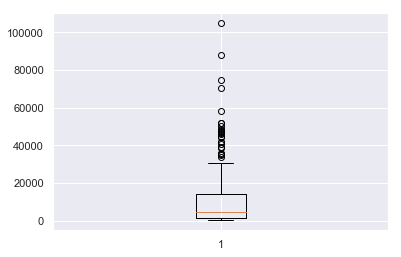

In [275]:
# 1. outlier treatment

plt.boxplot(country_data['gdpp'])

In [276]:
plt.show()

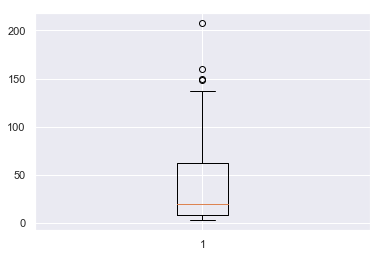

In [277]:
# 1. outlier treatment
plt.boxplot(country_data['child_mort'])
plt.show()

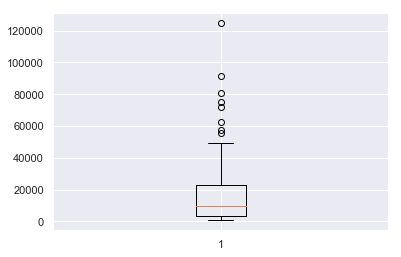

In [278]:
# 1. outlier treatment
plt.boxplot(country_data['income'])
plt.show()

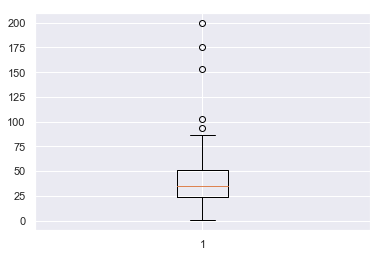

In [279]:
# 1. outlier treatment
plt.boxplot(country_data['exports'])
plt.show()

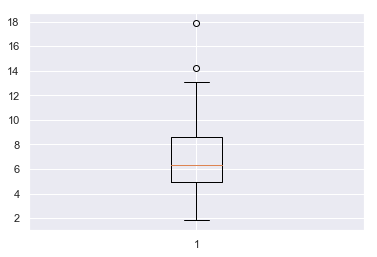

In [280]:
# 1. outlier treatment
plt.boxplot(country_data['health'])
plt.show()

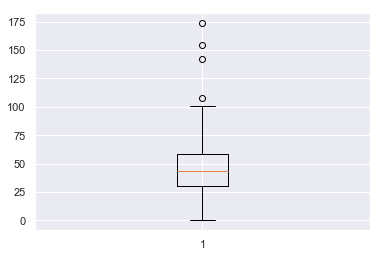

In [281]:
# 1. outlier treatment
plt.boxplot(country_data['imports'])
plt.show()

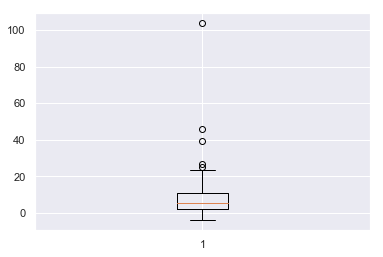

In [282]:
# 1. outlier treatment
plt.boxplot(country_data['inflation'])
plt.show()

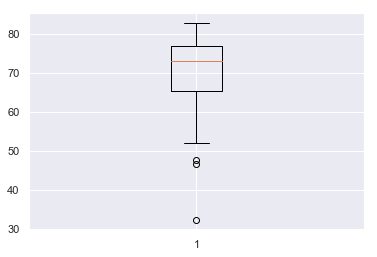

In [283]:
# 1. outlier treatment
plt.boxplot(country_data['life_expec'])
plt.show()

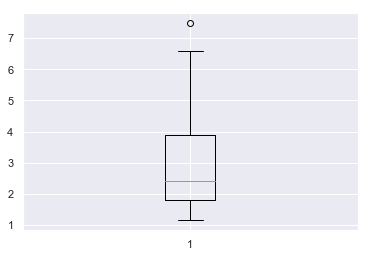

In [284]:
# 1. outlier treatment
plt.boxplot(country_data['total_fer'])
plt.show()

In [285]:
country_data['ID'] = country_data.index

In [286]:
# Let's preserve the ID column to some variable, so that we can make use of it later after perfroming PCA
ID   =country_data['ID']
country_data_copy = country_data.copy()

In [287]:
## Let's drop species column as this is a label column and we don't need it in case of unsupervised learning models
country_data.drop('country', axis = 1, inplace = True)

In [288]:
## Let's drop species column as this is a label column and we don't need it in case of unsupervised learning models
country_data.drop('ID', axis = 1, inplace = True)

## Min-Max Scaling

In [289]:
## Let's scale the data with 4 columns
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
dat2 = standard_scaler.fit_transform(country_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Principal Component Analysis

In [290]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=55)

In [291]:
#Performing the PCA
pca.fit(country_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=55,
  svd_solver='randomized', tol=0.0, whiten=False)

In [292]:
#What is the variance explained by the first principa component
pca.explained_variance_ratio_

array([9.47923065e-01, 5.20734600e-02, 1.76794667e-06, 1.38689143e-06,
       1.90998382e-07, 1.03865256e-07, 1.82060941e-08, 5.98917170e-09,
       8.64921244e-10])

## Scree Plot for identifying the number of components vs variance explained

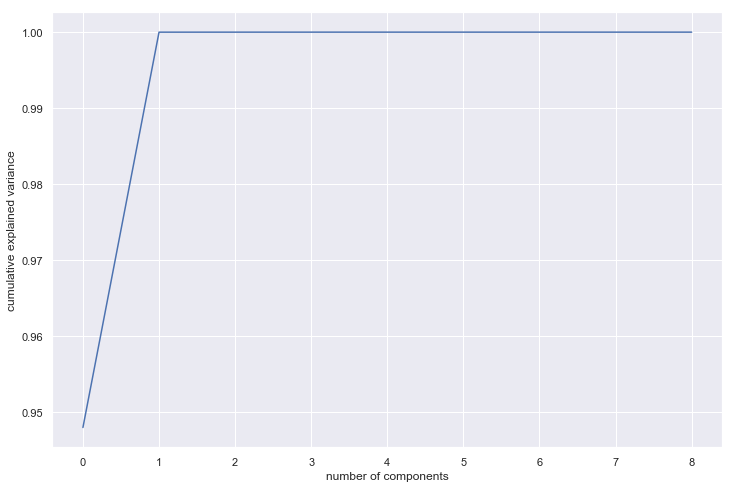

In [293]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## Applying Incremental PCA with the n_components from Scree plot

In [294]:
#Finally let's go ahead and do dimenstionality reduction
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=2)

In [295]:
# Transform the data here
df_pca = pca_final.fit_transform(country_data)
df_pca.shape

(167, 2)

#### Creating a transpose so that the each column is properly arranged

In [296]:
pc = np.transpose(df_pca)

In [297]:
# Create a dataframe with the PCs obtained
pca_df2 = pd.DataFrame({'PC1': pc[0], 'PC2':pc[1]})

In [298]:
# Check the head of the resultant data
pca_df2.head()

,PC1,PC2
0,-19815.128018,1651.124720
1,-11338.938992,-1493.469028
2,-8926.352589,-3264.684102
3,-14652.465937,867.795270
4,896.142032,-1898.478151


In [299]:
#Let's add back the ID to the given principal components
pca_df2 = pd.DataFrame({'ID': list(ID), 'PC1': pc[0], 'PC2':pc[1]})

In [300]:
pca_df2.head()

,ID,PC1,PC2
0,0,-19815.128018,1651.124720
1,1,-11338.938992,-1493.469028
2,2,-8926.352589,-3264.684102
3,3,-14652.465937,867.795270
4,4,896.142032,-1898.478151


In [301]:
pca_df2.shape

(167, 3)

### Outlier Analysis for PCA components

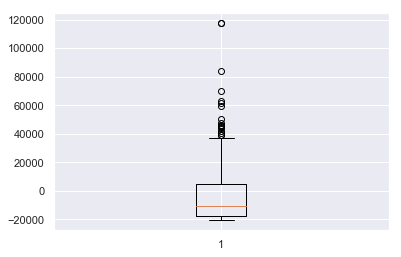

In [302]:
## Let's perform Outlier Analysis
#Let's do the outlier analysis before proceeding to clustering
# IQR: Inter Quntile Range Method
# For PC1
plt.boxplot(pca_df2.PC1)
Q1 = pca_df2.PC1.quantile(0.05)
Q3 = pca_df2.PC1.quantile(0.95)
IQR = Q3-Q1
pca_df2 = pca_df2[(pca_df2.PC1>=Q1) & (pca_df2.PC1<=Q3)]

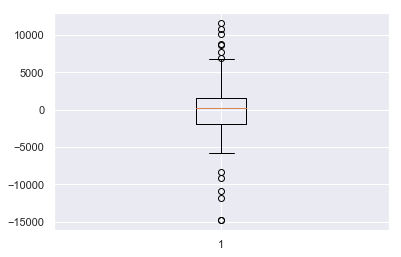

In [303]:
# For PC2
plt.boxplot(pca_df2.PC2)
Q1 = pca_df2.PC2.quantile(0.05)
Q3 = pca_df2.PC2.quantile(0.95)
IQR = Q3-Q1
pca_df2 = pca_df2[(pca_df2.PC2>=Q1) & (pca_df2.PC2<=Q3)]

## Visualisation of one component against another 

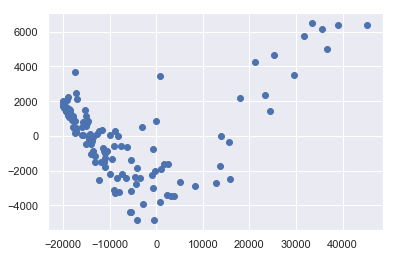

In [304]:
#Let's visualise the resultant PCs
plt.scatter(x='PC1',y='PC2',data=pca_df2)

Merging Principal components with the data provided

In [305]:
df_final = pca_df2.merge(country_data_copy, how= 'inner', on ='ID')

In [306]:
df_final

,ID,PC1,PC2,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,-19815.128018,1651.124720,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,1,-11338.938992,-1493.469028,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,2,-8926.352589,-3264.684102,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,3,-14652.465937,867.795270,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,4,896.142032,-1898.478151,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,5,-699.699306,-3004.511712,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,6,-14283.944388,92.967224,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,9,-5725.513089,-4391.181823,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840
8,12,-19071.076155,1229.949789,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758
9,13,744.735254,3473.405704,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000


In [307]:
pca_df2

,ID,PC1,PC2
0,0,-19815.128018,1651.124720
1,1,-11338.938992,-1493.469028
2,2,-8926.352589,-3264.684102
3,3,-14652.465937,867.795270
4,4,896.142032,-1898.478151
5,5,-699.699306,-3004.511712
6,6,-14283.944388,92.967224
9,9,-5725.513089,-4391.181823
12,12,-19071.076155,1229.949789
13,13,744.735254,3473.405704


## Min Max Scaling of the principal Components

In [308]:
pca_df3 = pca_df2[['PC1', 'PC2']]

In [309]:
# instantiate
scaler = StandardScaler()

# fit_transform
pca_df3_scaled = scaler.fit_transform(pca_df3)
pca_df3_scaled.shape

(133, 2)

## Elbow Curve for finding out the optimal number of clusters in K-means

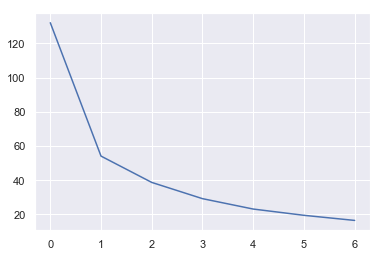

In [310]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(pca_df3_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

##### From the above elbow curve, we get that `k = 3`

## K-means clustering

In [311]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(pca_df3_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [312]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       0])

In [313]:
# assign the label
pca_df2['cluster_id'] = kmeans.labels_
pca_df2.head()

,ID,PC1,PC2,cluster_id
0,0,-19815.128018,1651.124720,0
1,1,-11338.938992,-1493.469028,2
2,2,-8926.352589,-3264.684102,2
3,3,-14652.465937,867.795270,0
4,4,896.142032,-1898.478151,2


### `Plotting Cluster with respect to clusters obtained`

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


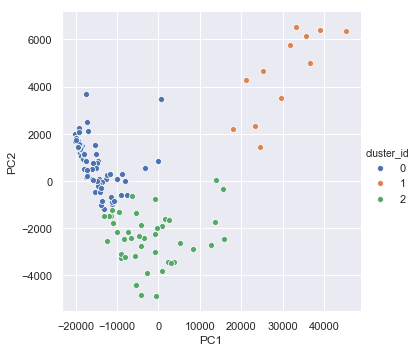

In [314]:
sns.pairplot(data=pca_df2, x_vars=["PC1"], y_vars=["PC2"], hue = "cluster_id", size=5)

### Cluster Profiling and Analysis

In [315]:
pca_df2.rename({'_id': 'ID'}, inplace=True)
cluster_output = country_data_copy.merge(pca_df2, how='inner', on = 'ID')

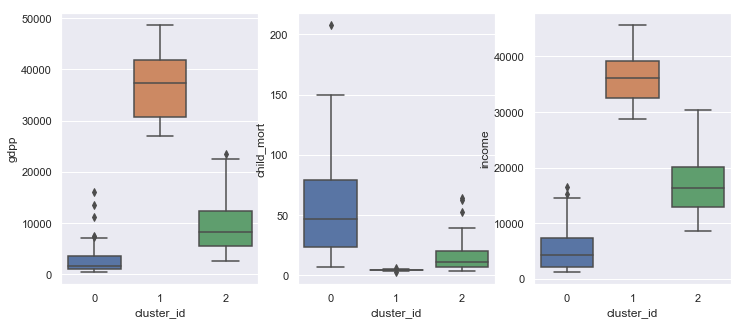

In [316]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id', y='gdpp', data=cluster_output)
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id', y='child_mort', data=cluster_output)
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id', y='income', data=cluster_output)
plt.show()

# Hierarchical Clustering

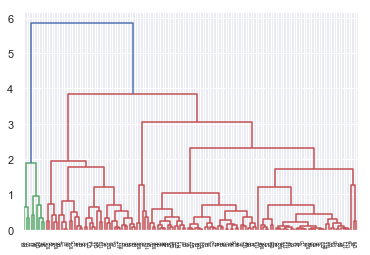

In [317]:
# complete linkage
mergings = linkage(pca_df3_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [318]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       0])

In [319]:
labels = pd.DataFrame(cluster_labels, columns = ['cluster_id'])
linkage_clustering_output = pd.concat([pd.DataFrame(pca_df3_scaled), labels], ignore_index=True)

In [320]:
#Let's add back the ID to the given principal components
pca_df3_scaled.shape

(133, 2)

In [321]:
#Let's add back the ID to the given principal components
pca_df3_labeled = pd.DataFrame({'ID': pca_df2['ID'].tolist(), 'PC1': pd.DataFrame(pca_df3_scaled)[0], 'PC2':pd.DataFrame(pca_df3_scaled)[1]})

In [322]:
pca_df3_labeled['cluster_id'] = labels

In [323]:
pca_df3_labeled

,ID,PC1,PC2,cluster_id
0,0,-0.871724,0.670392,0
1,1,-0.292217,-0.671009,0
2,2,-0.127272,-1.426563,1
3,3,-0.518759,0.336244,0
4,4,0.544280,-0.843775,1
5,5,0.435174,-1.315580,1
6,6,-0.493564,0.005723,0
7,9,0.091566,-1.907097,1
8,12,-0.820854,0.490730,0
9,13,0.533929,1.447729,0


### `Plotting Cluster with respect to clusters obtained`

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


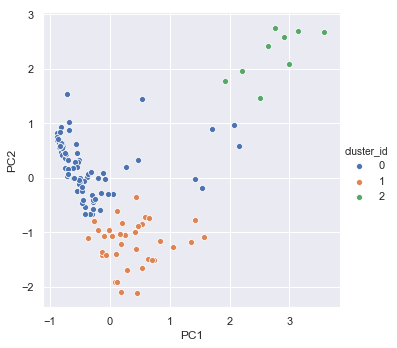

In [324]:
sns.pairplot(data=pca_df3_labeled, x_vars=["PC1"], y_vars=["PC2"], hue = "cluster_id", size=5)

### Cluster Profiling and Analysis using box and pair plots

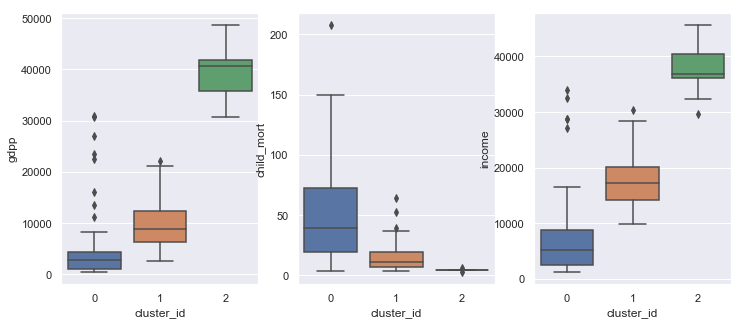

In [325]:
cluster_output_hier = country_data_copy.merge(pca_df3_labeled, how='inner', on = 'ID')
sns.set(style="darkgrid")
plt.figure(figsize=(12,5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id', y='gdpp', data=cluster_output_hier)
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id', y='child_mort', data=cluster_output_hier)
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id', y='income', data=cluster_output_hier)
plt.show()

In [326]:
cluster_output_hier_cluster1 = cluster_output_hier[cluster_output_hier['cluster_id'] == 0]
cluster_output_hier_cluster2 = cluster_output_hier[cluster_output_hier['cluster_id'] == 1]
cluster_output_hier_cluster3 = cluster_output_hier[cluster_output_hier['cluster_id'] == 2]

<Figure size 3600x3600 with 0 Axes>

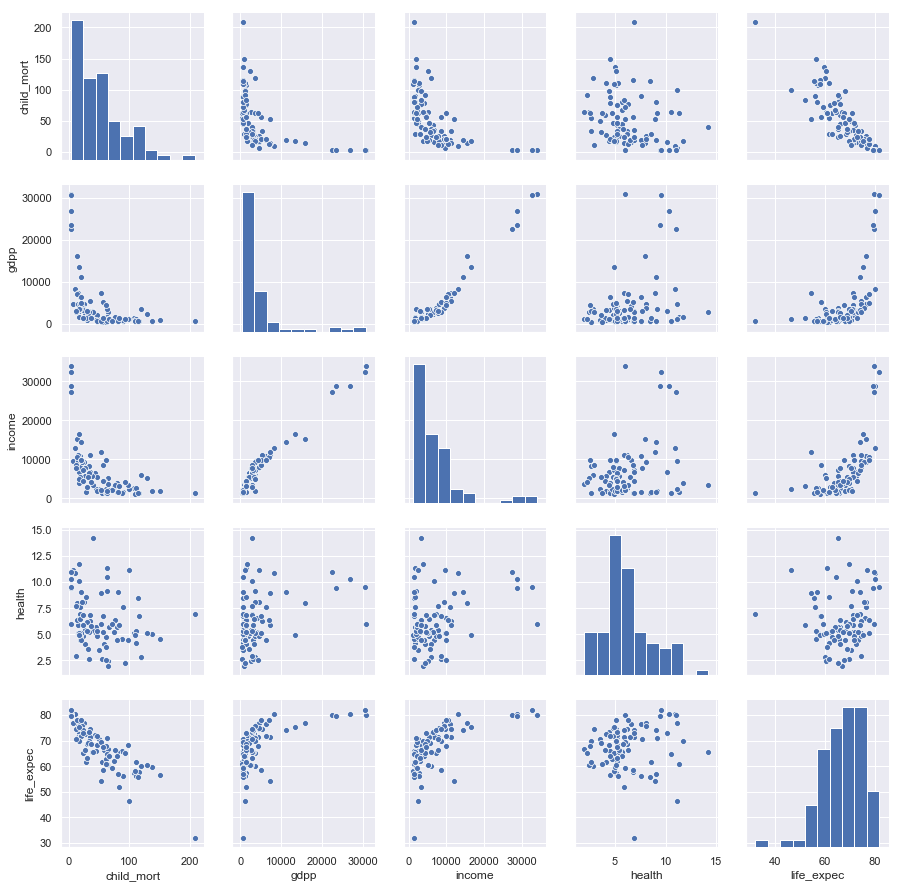

In [327]:
sns.set(style="darkgrid")
plt.figure(figsize=(50,50))
sns.pairplot(x_vars=['child_mort', 'gdpp', 'income', 'health', 'life_expec'], y_vars=['child_mort', 'gdpp', 'income', 'health', 'life_expec'], data=cluster_output_hier_cluster1)
plt.show()

<Figure size 3600x3600 with 0 Axes>

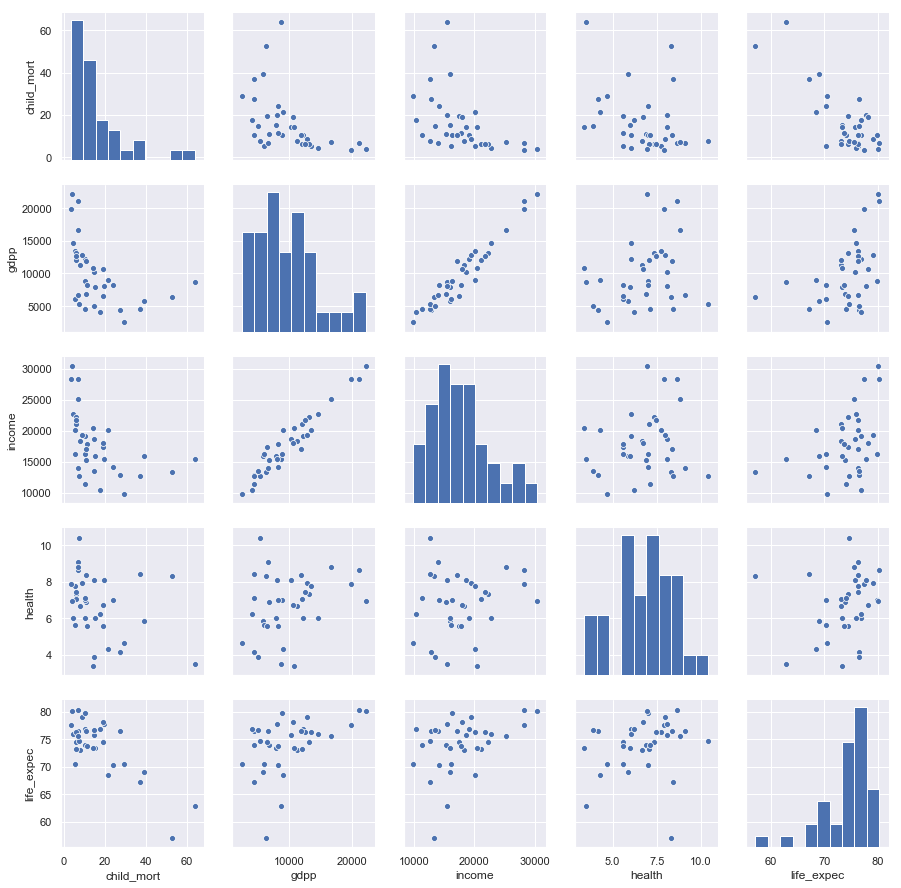

In [328]:
sns.set(style="darkgrid")
plt.figure(figsize=(50,50))
sns.pairplot(x_vars=['child_mort', 'gdpp', 'income', 'health', 'life_expec'], y_vars=['child_mort', 'gdpp', 'income', 'health', 'life_expec'], data=cluster_output_hier_cluster2)
plt.show()

<Figure size 3600x3600 with 0 Axes>

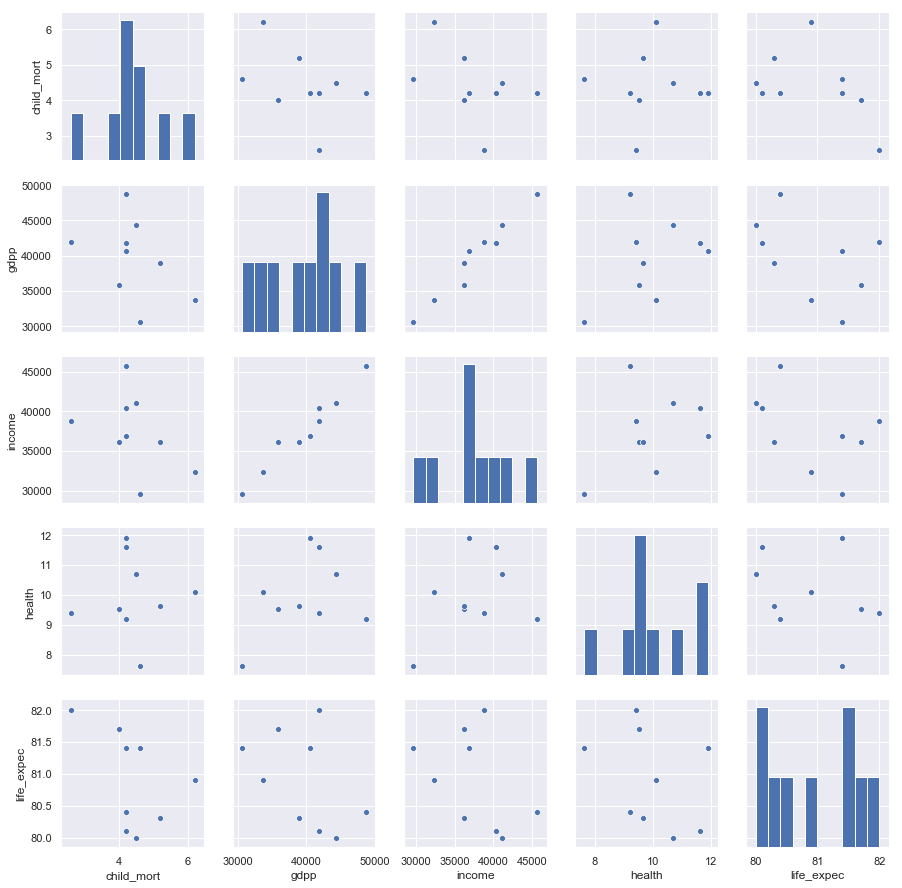

In [329]:
sns.set(style="darkgrid")
plt.figure(figsize=(50,50))
sns.pairplot(x_vars=['child_mort', 'gdpp', 'income', 'health', 'life_expec'], y_vars=['child_mort', 'gdpp', 'income', 'health', 'life_expec'], data=cluster_output_hier_cluster3)
plt.show()

In [330]:
cluster_output_hier_cluster1.sort_values(by='child_mort', ascending = False).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,PC1,PC2,cluster_id
54,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,66,-0.872077,0.736441,0
24,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,32,-0.839671,0.683274,0
78,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,97,-0.851528,0.642266,0
91,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,113,-0.612382,0.184000,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3,-0.518759,0.336244,0


In [331]:
cluster_output_hier_cluster1.sort_values(by='life_expec', ascending = True).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,PC1,PC2,cluster_id
54,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,66,-0.872077,0.736441,0
73,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,87,-0.804488,0.636037,0
132,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460,166,-0.746151,0.462224,0
108,South Africa,53.7,28.6,8.94,27.4,12000,6.35,54.3,2.59,7280,137,-0.039557,-0.288605,0
52,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547,64,-0.882938,0.733000,0


In [332]:
cluster_output_hier_cluster1.sort_values(by='total_fer', ascending = True).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,PC1,PC2,cluster_id
83,Moldova,17.2,39.2,11.70,78.5,3910,11.100,69.7,1.27,1630,102,-0.706860,0.330309,0
16,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610,20,-0.278230,-0.448272,0
110,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700,139,2.078895,0.965037,0
98,Portugal,3.9,29.9,11.00,37.4,27200,0.643,79.8,1.39,22500,122,1.430460,-0.024076,0
33,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,42,2.153154,0.585806,0


# Results

- Hierarchical Clustering provides better clustering results as opposed to the kmeans. So, we pick the results of Hierarchical Clustering for further analysis.
- Cluster 0 corresponds to the class with high child mortality rate and low gdpp.
- Cluster 1 corresponds to class with mediocre child mortality rate and medium gdpp.
- cluster 2 corresponds to the class with almost negligible child mortality rate and high gdpp.
- The spread of cluster 0 countries are more staggered over lower region of life_expectancy values as compared to the cluster 1 and cluster 2. That means cluster 0 in general have low life expectancy as opposed to cluster 1 and cluster 2.
- From the above analysis, we can conclude that the countries in cluster 0 needs more help as opposed to cluster 1 and cluster 2.

The are top five countries(belong to cluster 0) which need immediate help wrt to child mortality:
 - Haiti
 - Chad
 - Mali
 - Nigeria
 - Angola

The are top five countries(belong to cluster 0) which need immediate help wrt to life expectancy :
 - Haiti
 - Lesotho
 - Zambia
 - South Africa
 - Guinea-Bissau

The are top five countries(belong to cluster 0) which need immediate help wrt to total fertility :
 - Moldova
 - Bosnia and Herzegovina
 - Spain
 - Portugal
 - Cyprus